In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rameshvikaas
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset


100%|██████████| 534M/534M [00:09<00:00, 58.7MB/s]

In [ ]:
train_path = "/content/vegetable-image-dataset/Vegetable Images/train"
test_path = "/content/vegetable-image-dataset/Vegetable Images/test"
validation_path = "/content/vegetable-image-dataset/Vegetable Images/validation"

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = (224,224)

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    validation_split=None,
    label_mode="int"
)

Found 15000 files belonging to 15 classes.


In [ ]:
class_names = train_data.class_names

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    validation_split=None,
    label_mode="int"
)

val_data = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    validation_split=None,
    label_mode="int"
)

Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


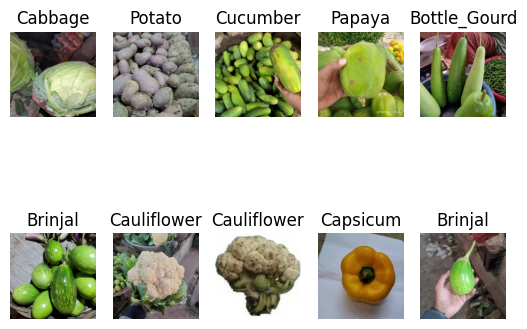

In [ ]:
classes = train_data.class_names

for image, label in train_data.take(1):
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(classes[label[i]])
    plt.axis('off')

In [ ]:
train_data = train_data.map(lambda x,y : (x/255,y))
test_data = test_data.map(lambda x,y : (x/255,y))
val_data = val_data.map(lambda x,y : (x/255,y))

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomContrast(0.2),
    ]
)

In [ ]:
base_model = tf.keras.applications.EfficientNetV2M(
    include_top=False ,
    weights='imagenet',
    pooling='avg',
    include_preprocessing=False
)

base_model.trainable = False

# classifier = tf.keras.Sequential([

#     tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

#     data_augmentation,

#     base_model,

#     layers.Dense(64, use_bias=False),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.5),

#     layers.Dense(15, activation='softmax')

# ])

inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = base_model(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
outputs = layers.Dense(15, activation='softmax')(x)


214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
classifier = tf.keras.Model(inputs, outputs)

classifier.compile(
            optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
history = classifier.fit(train_data,
                         epochs=10,
                         validation_data=val_data
                         )

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 174s 594ms/step - accuracy: 0.8243 - loss: 0.7522 - val_accuracy: 0.9827 - val_loss: 0.1514
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 556ms/step - accuracy: 0.9780 - loss: 0.1079 - val_accuracy: 0.9867 - val_loss: 0.0501
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 555ms/step - accuracy: 0.9873 - loss: 0.0603 - val_accuracy: 0.9950 - val_loss: 0.0266
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 554ms/step - accuracy: 0.9879 - loss: 0.0499 - val_accuracy: 0.9973 - val_loss: 0.0193
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 554ms/step - accuracy: 0.9898 - loss: 0.0393 - val_accuracy: 0.9933 - val_loss: 0.0229
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 554ms/step - accuracy: 0.9929 - loss: 0.0326 - val_accuracy: 0.9953 - val_loss: 0.0151
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 555ms/step - accuracy: 0.9919 - loss: 0.0300 - val_accuracy: 0.9970 - val_loss: 0.0133
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 555ms/step - accuracy: 0.9932 -

In [ ]:
classifier.evaluate(test_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 453ms/step - accuracy: 0.9961 - loss: 0.0134


[0.014579525217413902, 0.9956666827201843]

In [ ]:
classifier.save('cnn_model.h5')